In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import operator
import keras
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [2]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape", x_train.shape)

x_train_copy = x_train.reshape(-1, 784)


x_train.shape (60000, 28, 28)


In [3]:
# tsne_initial = TSNE(
#         n_components=2,
#         init="pca",
#         learning_rate="auto",
#         n_iter=500,
#         n_iter_without_progress=150,
#         n_jobs=2,
#         random_state=0).fit_transform(x_train_copy)


# plt.figure(figsize=(15,15))
# plt.scatter(tsne_initial[y_train==0, 0], tsne_initial[y_train==0, 1], label="0", marker="$0$", s=200)
# plt.scatter(tsne_initial[y_train==1, 0], tsne_initial[y_train==1, 1], label="1", marker="$1$", s=200)
# plt.scatter(tsne_initial[y_train==2, 0], tsne_initial[y_train==2, 1], label="2", marker="$2$", s=200)
# plt.scatter(tsne_initial[y_train==3, 0], tsne_initial[y_train==3, 1], label="3", marker="$3$", s=200)
# plt.scatter(tsne_initial[y_train==4, 0], tsne_initial[y_train==4, 1], label="4", marker="$4$", s=200)
# plt.scatter(tsne_initial[y_train==5, 0], tsne_initial[y_train==5, 1], label="5", marker="$5$", s=200)
# plt.scatter(tsne_initial[y_train==6, 0], tsne_initial[y_train==6, 1], label="6", marker="$6$", s=200)
# plt.scatter(tsne_initial[y_train==7, 0], tsne_initial[y_train==7, 1], label="7", marker="$7$", s=200)
# plt.scatter(tsne_initial[y_train==8, 0], tsne_initial[y_train==8, 1], label="8", marker="$8$", s=200)
# plt.scatter(tsne_initial[y_train==9, 0], tsne_initial[y_train==9, 1], label="9", marker="$9$", s=200)
# plt.legend()
# plt.show()


In [4]:
# collect each classes
x_zero = x_train[np.where(y_train == 0)]
y_zero = np.eye(10)[y_train[np.where(y_train==0)]]

x_one = x_train[np.where(y_train == 1)]
y_one = np.eye(10)[y_train[np.where(y_train==1)]]

x_two = x_train[np.where(y_train == 2)]
y_two = np.eye(10)[y_train[np.where(y_train==2)]]

x_three = x_train[np.where(y_train == 3)]
y_three = np.eye(10)[y_train[np.where(y_train==3)]]

x_four = x_train[np.where(y_train == 4)]
y_four = np.eye(10)[y_train[np.where(y_train==4)]]

x_five = x_train[np.where(y_train == 5)]
y_five = np.eye(10)[y_train[np.where(y_train==5)]]

x_six = x_train[np.where(y_train == 6)]
y_six = np.eye(10)[y_train[np.where(y_train==6)]]

x_seven = x_train[np.where(y_train == 7)]
y_seven = np.eye(10)[y_train[np.where(y_train==7)]]

x_eight = x_train[np.where(y_train == 8)]
y_eight = np.eye(10)[y_train[np.where(y_train==8)]]

x_nine = x_train[np.where(y_train == 9)]
y_nine = np.eye(10)[y_train[np.where(y_train==9)]]

In [5]:
# convert label to one-hot vector
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [6]:
# print("x_zero.shape\n", x_zero.shape)
# print("y_zero.shape\n", y_zero.shape)
# print("y_zero[0:5]\n", y_zero[0:5])

# print("x_one.shape\n", x_one.shape)
# print("y_one.shape\n", y_one.shape)
# print("y_one[0:5]\n", y_one[0:5])

# print("x_two.shape\n", x_two.shape)
# print("y_two.shape\n", y_two.shape)
# print("y_two[0:5]\n", y_two[0:5])

# print("x_three.shape\n", x_three.shape)
# print("y_three.shape\n", y_three.shape)
# print("y_three[0:5]\n", y_three[0:5])

# print("x_four.shape\n", x_four.shape)
# print("y_four.shape\n", y_four.shape)
# print("y_four[0:5]\n", y_four[0:5])

# print("x_five.shape\n", x_five.shape)
# print("y_five.shape\n", y_five.shape)
# print("y_five[0:5]\n", y_five[0:5])

# print("x_six.shape\n", x_six.shape)
# print("y_six.shape\n", y_six.shape)
# print("y_six[0:5]\n", y_six[0:5])

# print("x_seven.shape\n", x_seven.shape)
# print("y_seven.shape\n", y_seven.shape)
# print("y_seven[0:5]\n", y_seven[0:5])

# print("x_eight.shape\n", x_eight.shape)
# print("y_eight.shape\n", y_eight.shape)
# print("y_eight[0:5]\n", y_eight[0:5])

# print("x_nine.shape\n", x_nine.shape)
# print("y_nine.shape\n", y_nine.shape)
# print("y_nine[0:5]\n", y_nine[0:5])

In [7]:
# (train set)
# initial balanced label set = 5,000

x_labeled = np.concatenate([x_zero[0:400], x_one[0:400], x_two[0:400], 
                            x_three[0:400], x_four[0:400], x_five[0:400], 
                            x_six[0:400], x_seven[0:400], x_eight[0:400], 
                            x_nine[0:400]], axis=0)

y_labeled = np.concatenate([y_zero[0:400], y_one[0:400], y_two[0:400], 
                            y_three[0:400], y_four[0:400], y_five[0:400], 
                            y_six[0:400], y_seven[0:400], y_eight[0:400], 
                            y_nine[0:400]], axis=0)


# fix val set  1,000
x_val = np.concatenate([x_zero[400:500], x_one[400:500], x_two[400:500], 
                        x_three[400:500], x_four[400:500], x_five[400:500], 
                        x_six[400:500], x_seven[400:500], x_eight[400:500], 
                        x_nine[400:500]], axis=0)

y_val = np.concatenate([y_zero[400:500], y_one[400:500], y_two[400:500], 
                        y_three[400:500], y_four[400:500], y_five[400:500], 
                        y_six[400:500], y_seven[400:500], y_eight[400:500], 
                        y_nine[400:500]], axis=0)



x_unlabeled = np.concatenate([x_zero[1000:4000], x_one[1000:4000], x_two[1000:4000], 
                              x_three[1000:4000], x_four[1000:4000], x_five[1000:4000], 
                              x_six[1000:4000], x_seven[1000:4000], x_eight[1000:4000], 
                              x_nine[1000:4000]], axis=0)

y_unlabeled = np.concatenate([y_zero[1000:4000], y_one[1000:4000], y_two[1000:4000], 
                              y_three[1000:4000], y_four[1000:4000], y_five[1000:4000], 
                              y_six[1000:4000], y_seven[1000:4000], y_eight[1000:4000], 
                              y_nine[1000:4000]], axis=0)



print("x_labeled.shape", x_labeled.shape)
print("y_labeled.shape", y_labeled.shape)
print("x_unlabeled.shape", x_unlabeled.shape)
print("y_unlabeled.shape", y_unlabeled.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_labeled.shape (4000, 28, 28)
y_labeled.shape (4000, 10)
x_unlabeled.shape (30000, 28, 28)
y_unlabeled.shape (30000, 10)
x_test.shape (10000, 28, 28)
y_test.shape (10000, 10)


In [8]:
# shuffle x_label_5000 and y_label_5000
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(4000))
x_labeled = x_labeled[shuffled_indices, :, :]
y_labeled = y_labeled[shuffled_indices, :]

In [9]:
# shuffle val set
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(1000))
x_val = x_val[shuffled_indices, :, :]
y_val = y_val[shuffled_indices, :]

In [10]:
# shuffle test set
np.random.seed(99)
shuffled_indices = np.random.permutation(np.arange(10000))
x_test = x_test[shuffled_indices, :, :]
y_test = y_test[shuffled_indices, :]

In [11]:
# shuffle unlabel set
np.random.seed(55)
shuffled_indices = np.random.permutation(np.arange(30000))
x_unlabeled = x_unlabeled[shuffled_indices, :, :]
y_unlabeled = y_unlabeled[shuffled_indices, :]

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, kernel_regularizer='l2', activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
x_labeled = np.concatenate([x_labeled, x_val], axis=0)
y_labeled = np.concatenate([y_labeled, y_val], axis=0)

# SELF-TRAINING

learning_rate
 0.001
ITERATION : 0
Epoch 1/200
125/125 [==============================] - 2s 3ms/step - loss: 2.6210 - accuracy: 0.8220 - val_loss: 1.0255 - val_accuracy: 0.8910
Epoch 2/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.9038 - val_loss: 0.6702 - val_accuracy: 0.8880
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.9100 - val_loss: 0.6065 - val_accuracy: 0.8810
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.9120 - val_loss: 0.5763 - val_accuracy: 0.9000
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.9195 - val_loss: 0.5645 - val_accuracy: 0.8890
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.9220 - val_loss: 0.5406 - val_accuracy: 0.9140
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.9302 - val_

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


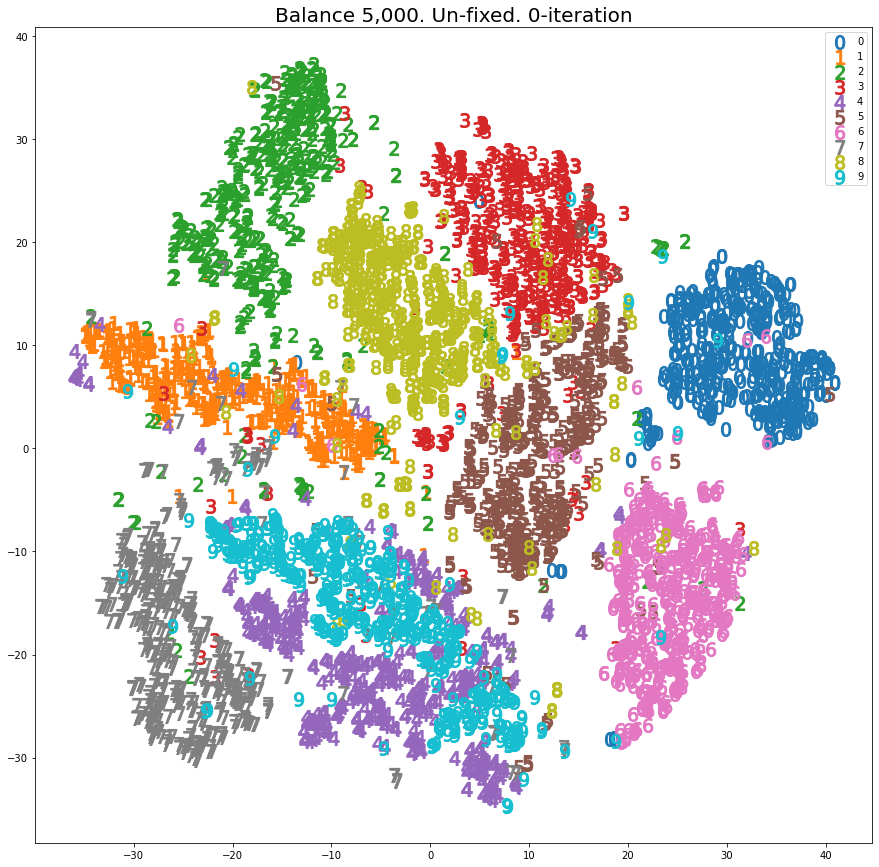

x_labeled.shape
 (5000, 28, 28)
y_labeled.shape
 (5000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.5070 - accuracy: 0.8960
predictions.shape
 (30000, 10)
len(prob_row_pair)
 30000
len(prob_row_pair_sorted)
 30000
len(expected_reference_rows)
 30000
sorted_predictions.shape
 (30000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([4 0 0 0 0], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


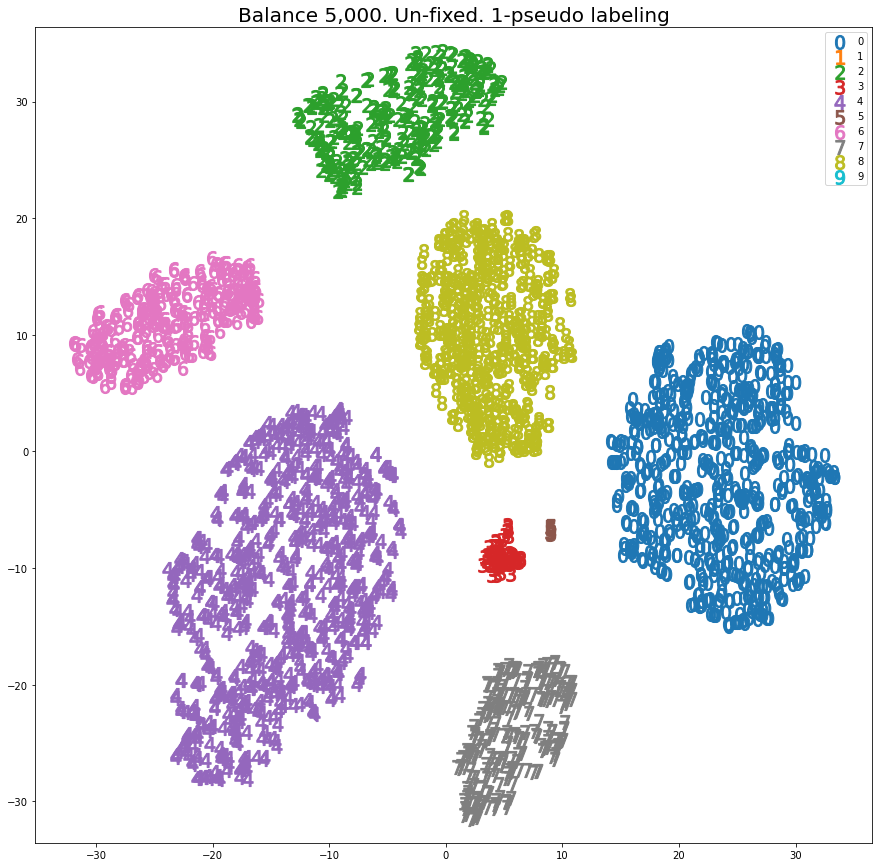

x_unlabeled.shape
 (27000, 28, 28)
len(x_unlabeled) : 27000
---------------------------------------------------------
ITERATION : 1
Epoch 1/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.9469 - val_loss: 0.1784 - val_accuracy: 1.0000
Epoch 2/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.9522 - val_loss: 0.1823 - val_accuracy: 0.9975
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.9477 - val_loss: 0.1847 - val_accuracy: 0.9994
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.9548 - val_loss: 0.1747 - val_accuracy: 1.0000
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9547 - val_loss: 0.1706 - val_accuracy: 0.9994
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.9563 - val_loss: 0.1675 - val_accuracy: 1.0000
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


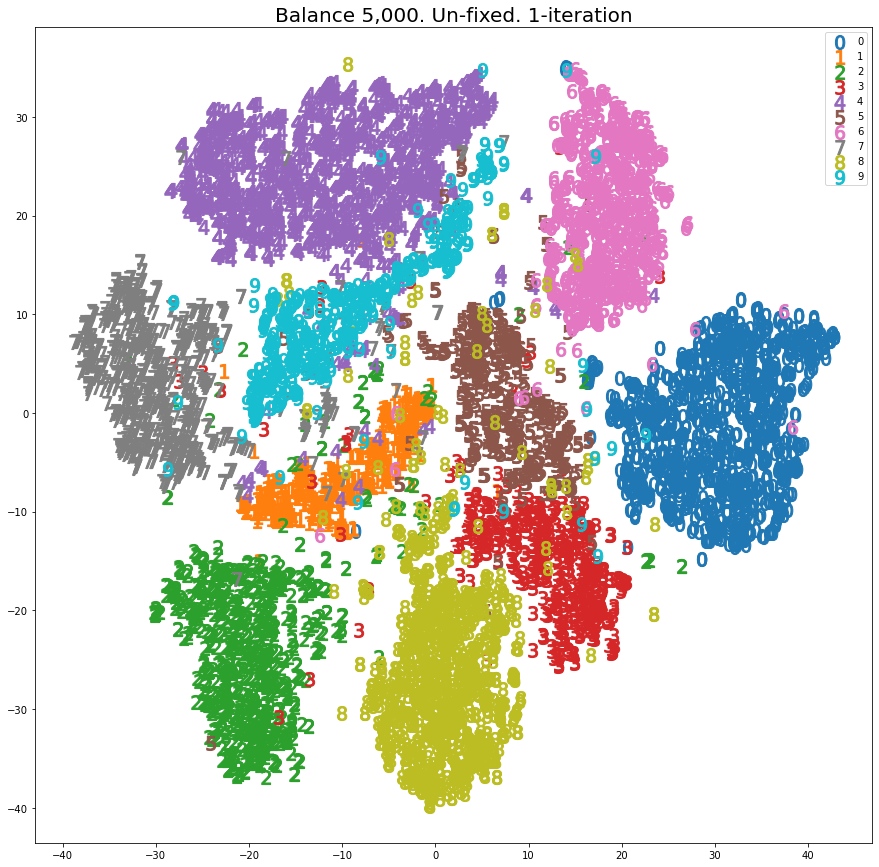

x_labeled.shape
 (8000, 28, 28)
y_labeled.shape
 (8000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.9366
predictions.shape
 (27000, 10)
len(prob_row_pair)
 27000
len(prob_row_pair_sorted)
 27000
len(expected_reference_rows)
 27000
sorted_predictions.shape
 (27000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([7 7 7 7 7], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


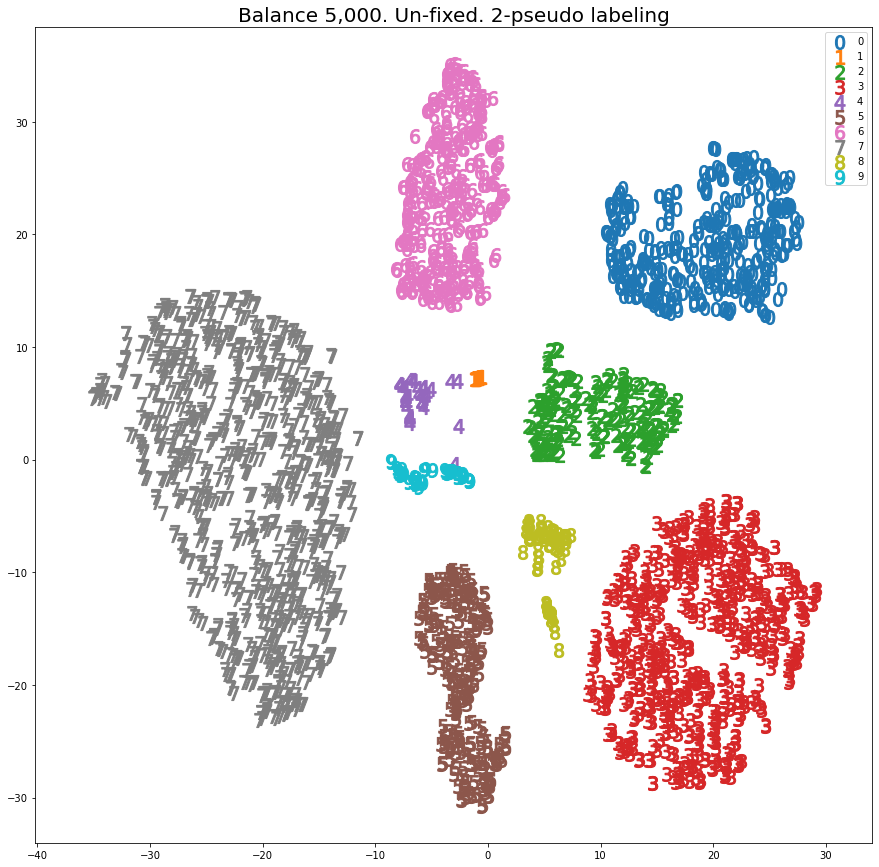

x_unlabeled.shape
 (24000, 28, 28)
len(x_unlabeled) : 24000
---------------------------------------------------------
ITERATION : 2
Epoch 1/200
275/275 [==============================] - 1s 3ms/step - loss: 0.2059 - accuracy: 0.9767 - val_loss: 0.1262 - val_accuracy: 1.0000
Epoch 2/200
275/275 [==============================] - 1s 3ms/step - loss: 0.2163 - accuracy: 0.9728 - val_loss: 0.1376 - val_accuracy: 0.9977
Epoch 3/200
275/275 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9684 - val_loss: 0.1401 - val_accuracy: 0.9995
Epoch 4/200
275/275 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9731 - val_loss: 0.1373 - val_accuracy: 1.0000
Epoch 5/200
275/275 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9734 - val_loss: 0.1304 - val_accuracy: 0.9995
Epoch 6/200
275/275 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9722 - val_loss: 0.1353 - val_accuracy: 1.0000
Epoch 6: e

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


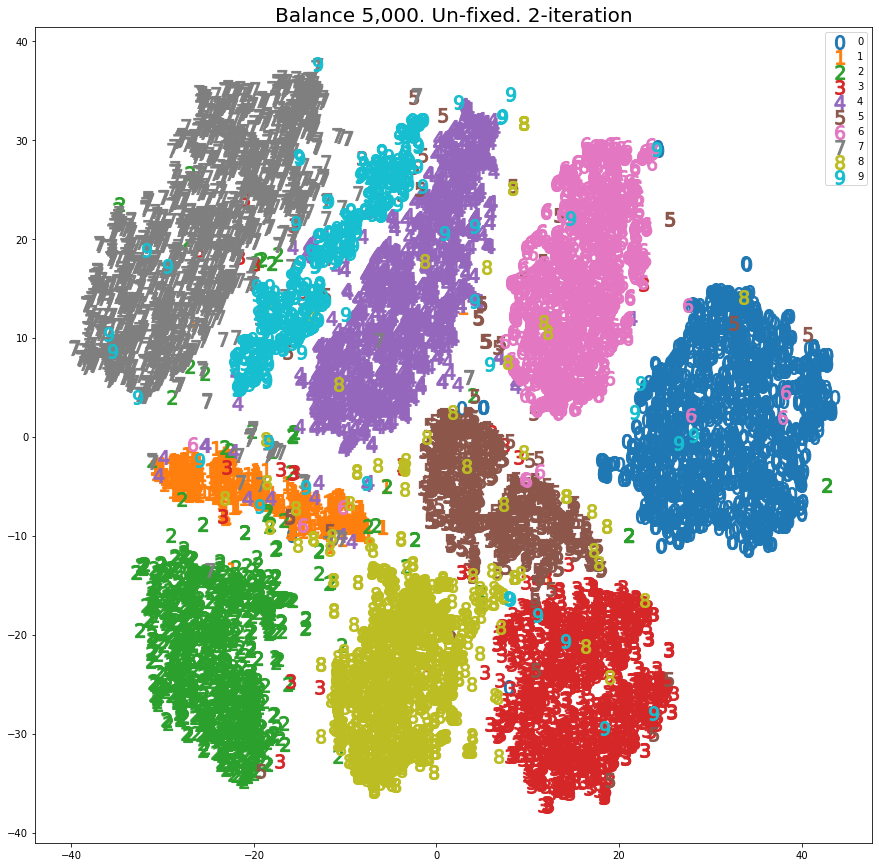

x_labeled.shape
 (11000, 28, 28)
y_labeled.shape
 (11000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.9173
predictions.shape
 (24000, 10)
len(prob_row_pair)
 24000
len(prob_row_pair_sorted)
 24000
len(expected_reference_rows)
 24000
sorted_predictions.shape
 (24000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([4 4 4 4 4], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


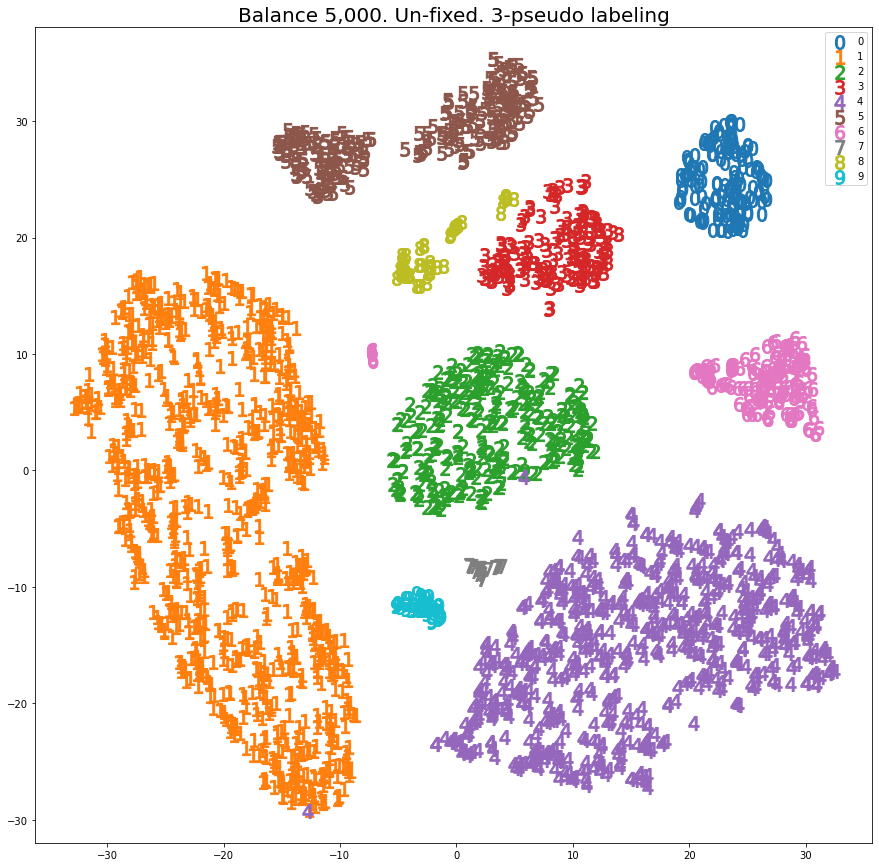

x_unlabeled.shape
 (21000, 28, 28)
len(x_unlabeled) : 21000
---------------------------------------------------------
ITERATION : 3
Epoch 1/200
350/350 [==============================] - 1s 3ms/step - loss: 0.1833 - accuracy: 0.9774 - val_loss: 0.1451 - val_accuracy: 0.9929
Epoch 2/200
350/350 [==============================] - 1s 2ms/step - loss: 0.1833 - accuracy: 0.9752 - val_loss: 0.1269 - val_accuracy: 0.9975
Epoch 3/200
350/350 [==============================] - 1s 2ms/step - loss: 0.1887 - accuracy: 0.9736 - val_loss: 0.1398 - val_accuracy: 0.9968
Epoch 4/200
350/350 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9756 - val_loss: 0.1404 - val_accuracy: 0.9914
Epoch 5/200
350/350 [==============================] - 1s 2ms/step - loss: 0.1806 - accuracy: 0.9761 - val_loss: 0.1606 - val_accuracy: 0.9932
Epoch 6/200
350/350 [==============================] - 1s 2ms/step - loss: 0.1811 - accuracy: 0.9765 - val_loss: 0.1475 - val_accuracy: 0.9918
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


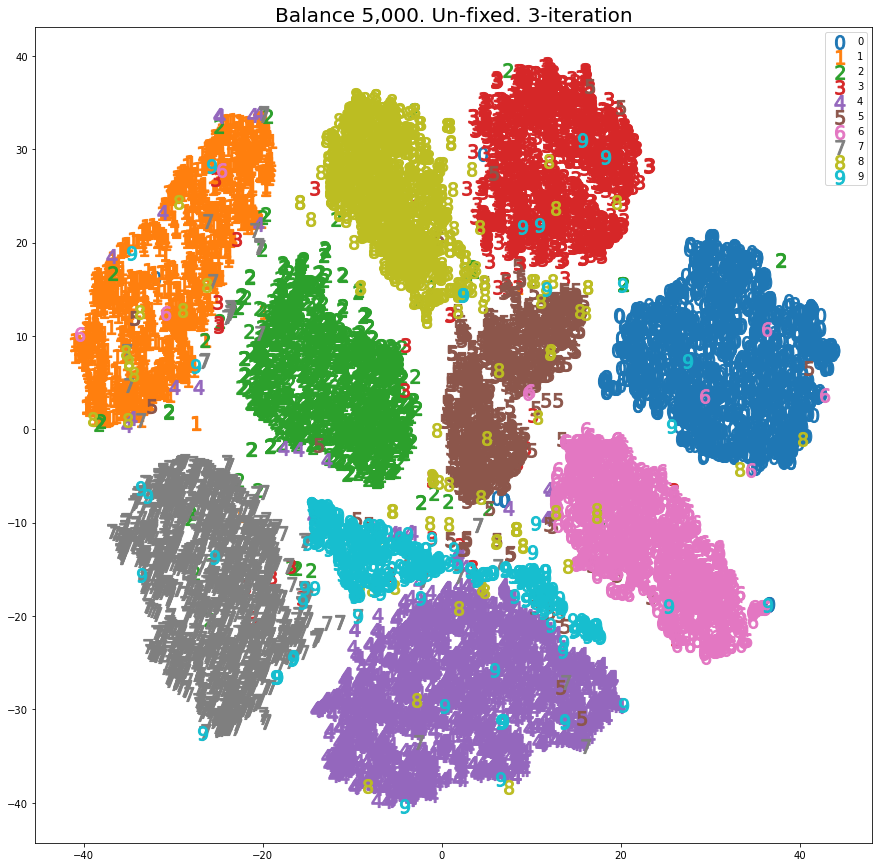

x_labeled.shape
 (14000, 28, 28)
y_labeled.shape
 (14000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.9143
predictions.shape
 (21000, 10)
len(prob_row_pair)
 21000
len(prob_row_pair_sorted)
 21000
len(expected_reference_rows)
 21000
sorted_predictions.shape
 (21000, 10)
sorted_y_pseudo_one_hot
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([0 0 0 3 0], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


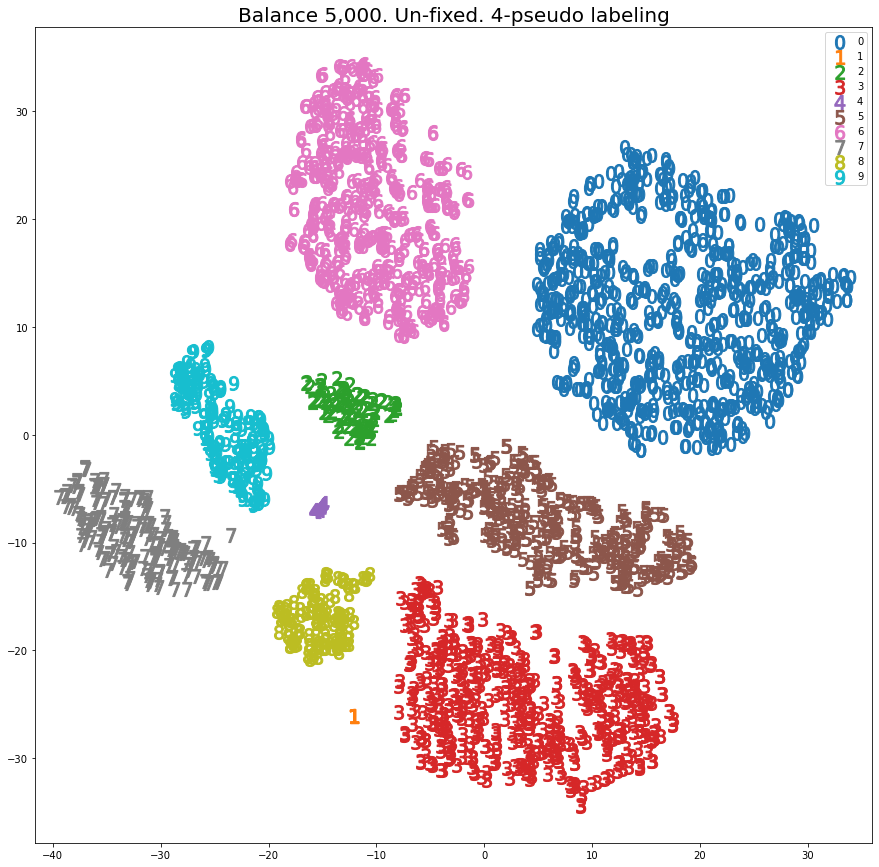

x_unlabeled.shape
 (18000, 28, 28)
len(x_unlabeled) : 18000
---------------------------------------------------------
ITERATION : 4
Epoch 1/200
425/425 [==============================] - 1s 2ms/step - loss: 0.1642 - accuracy: 0.9812 - val_loss: 0.1582 - val_accuracy: 0.9821
Epoch 2/200
425/425 [==============================] - 1s 2ms/step - loss: 0.1586 - accuracy: 0.9802 - val_loss: 0.1102 - val_accuracy: 0.9971
Epoch 3/200
425/425 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9793 - val_loss: 0.1185 - val_accuracy: 0.9974
Epoch 4/200
425/425 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9790 - val_loss: 0.1047 - val_accuracy: 0.9997
Epoch 5/200
425/425 [==============================] - 1s 2ms/step - loss: 0.1574 - accuracy: 0.9806 - val_loss: 0.1061 - val_accuracy: 0.9979
Epoch 6/200
425/425 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9784 - val_loss: 0.1140 - val_accuracy: 0.9994
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


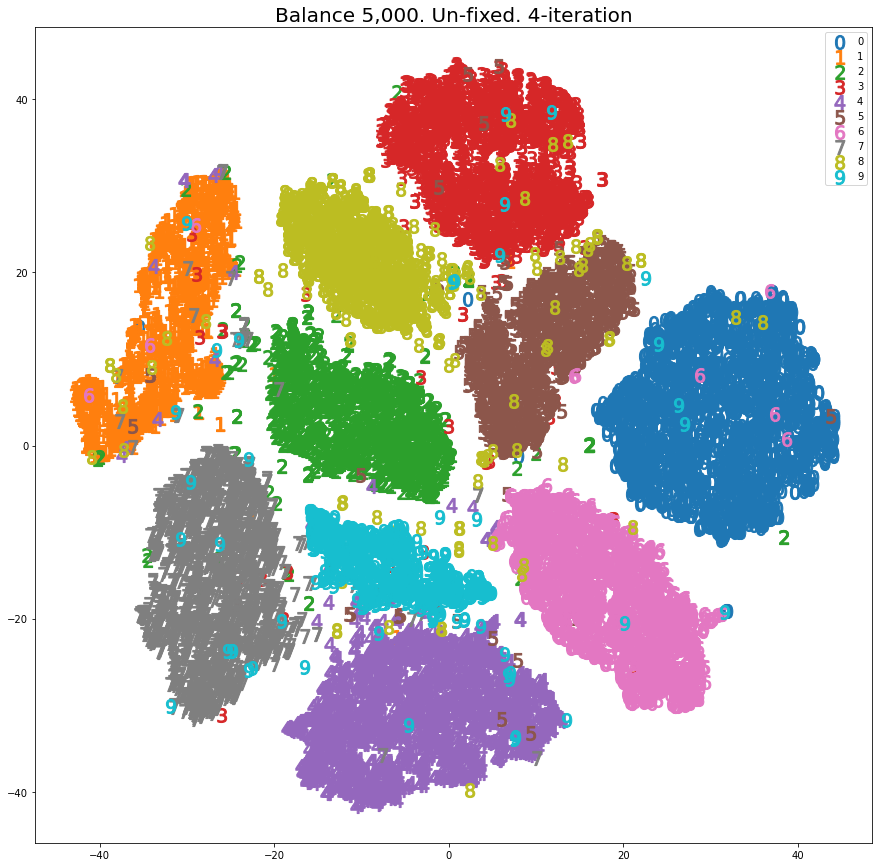

x_labeled.shape
 (17000, 28, 28)
y_labeled.shape
 (17000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.9262
predictions.shape
 (18000, 10)
len(prob_row_pair)
 18000
len(prob_row_pair_sorted)
 18000
len(expected_reference_rows)
 18000
sorted_predictions.shape
 (18000, 10)
sorted_y_pseudo_one_hot
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


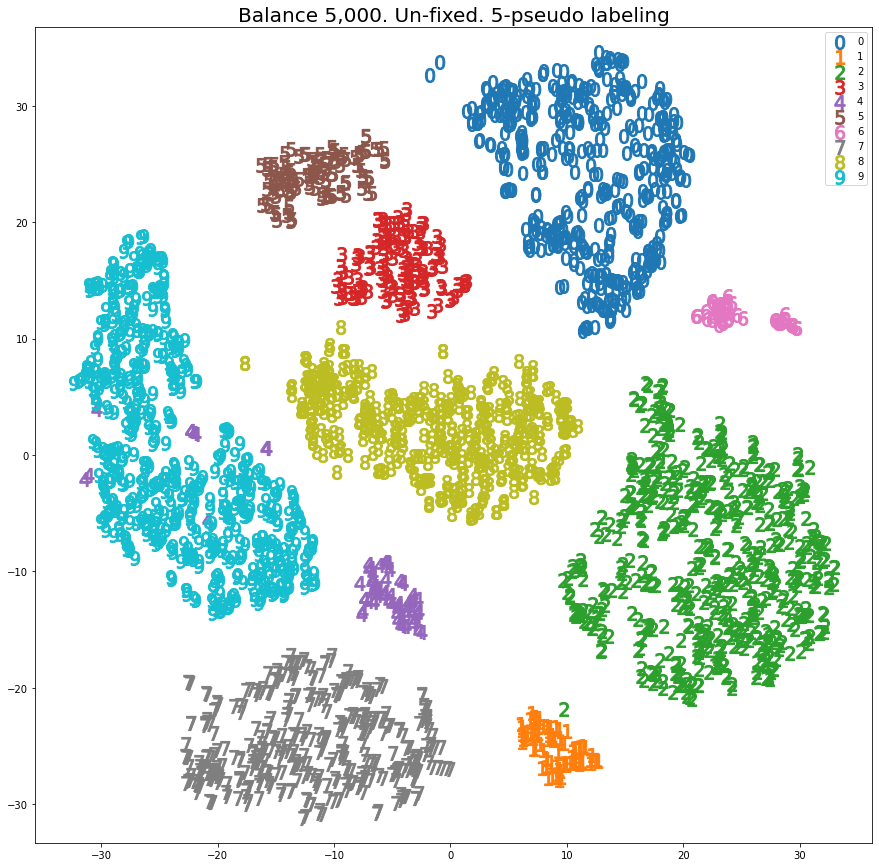

x_unlabeled.shape
 (15000, 28, 28)
len(x_unlabeled) : 15000
---------------------------------------------------------
ITERATION : 5
Epoch 1/200
500/500 [==============================] - 2s 3ms/step - loss: 0.1400 - accuracy: 0.9818 - val_loss: 0.1180 - val_accuracy: 0.9948
Epoch 2/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1404 - accuracy: 0.9825 - val_loss: 0.1382 - val_accuracy: 0.9908
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1438 - accuracy: 0.9818 - val_loss: 0.1451 - val_accuracy: 0.9860
Epoch 4/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.9826 - val_loss: 0.1216 - val_accuracy: 0.9908
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9816 - val_loss: 0.1153 - val_accuracy: 0.9948
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1367 - accuracy: 0.9833 - val_loss: 0.1263 - val_accuracy: 0.9902
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


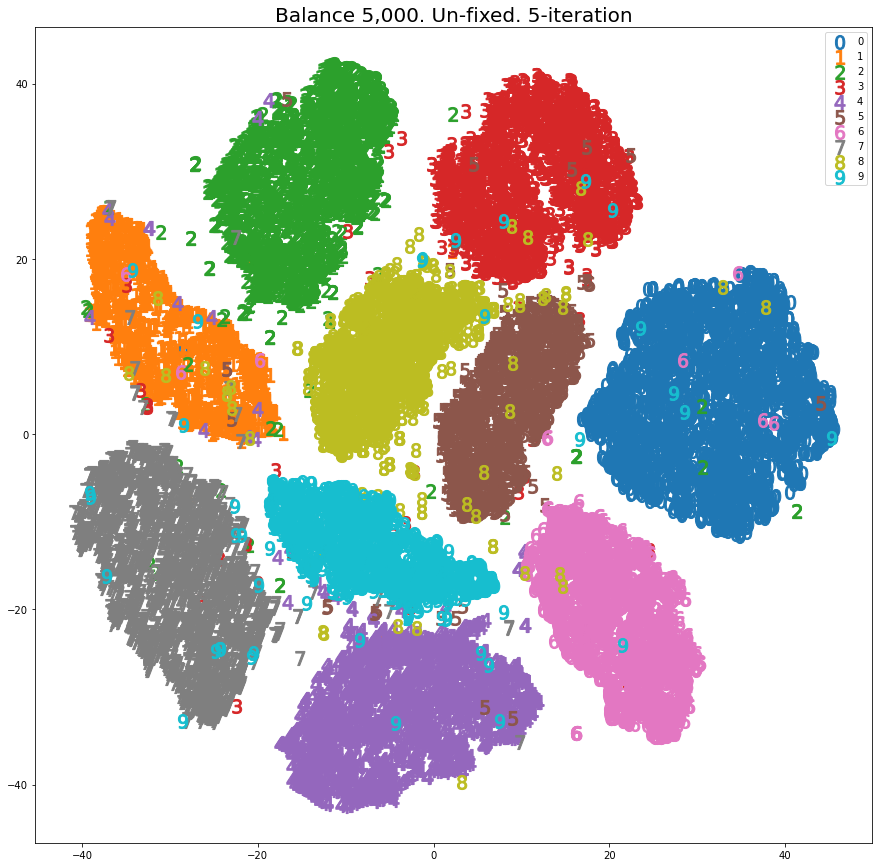

x_labeled.shape
 (20000, 28, 28)
y_labeled.shape
 (20000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.9143
predictions.shape
 (15000, 10)
len(prob_row_pair)
 15000
len(prob_row_pair_sorted)
 15000
len(expected_reference_rows)
 15000
sorted_predictions.shape
 (15000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([3 5 8 4 8], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


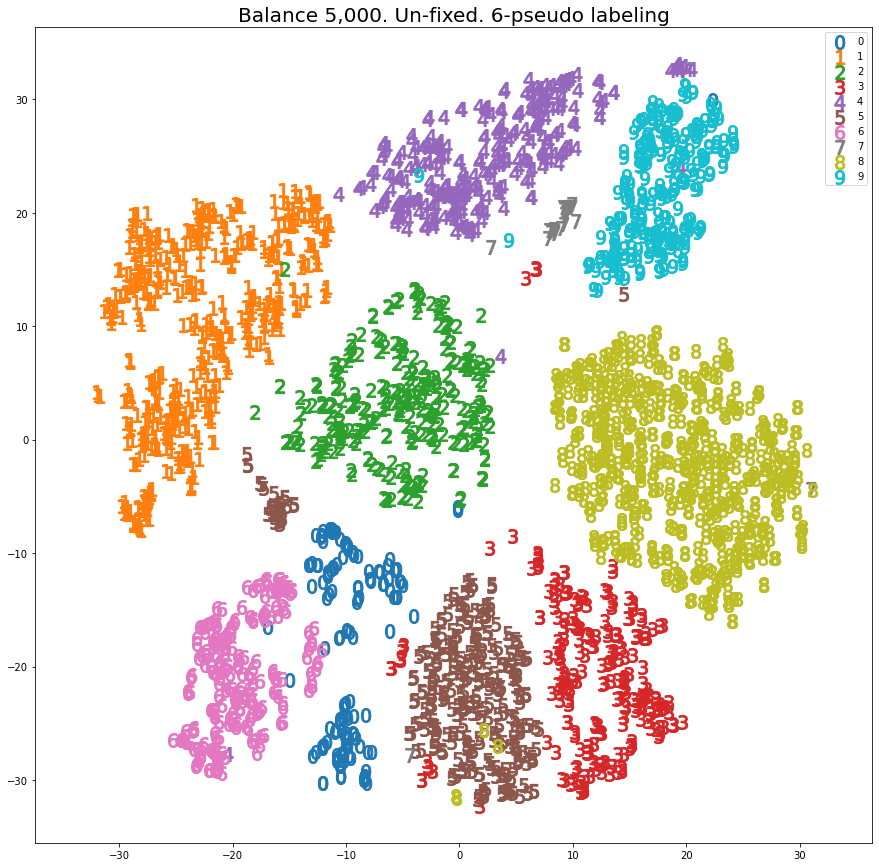

x_unlabeled.shape
 (12000, 28, 28)
len(x_unlabeled) : 12000
---------------------------------------------------------
ITERATION : 6
Epoch 1/200
575/575 [==============================] - 2s 3ms/step - loss: 0.1264 - accuracy: 0.9846 - val_loss: 0.1285 - val_accuracy: 0.9898
Epoch 2/200
575/575 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9853 - val_loss: 0.1302 - val_accuracy: 0.9878
Epoch 3/200
575/575 [==============================] - 1s 2ms/step - loss: 0.1286 - accuracy: 0.9831 - val_loss: 0.1789 - val_accuracy: 0.9652
Epoch 4/200
575/575 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9843 - val_loss: 0.1176 - val_accuracy: 0.9926
Epoch 5/200
575/575 [==============================] - 1s 2ms/step - loss: 0.1245 - accuracy: 0.9845 - val_loss: 0.1210 - val_accuracy: 0.9911
Epoch 6/200
575/575 [==============================] - 1s 2ms/step - loss: 0.1258 - accuracy: 0.9840 - val_loss: 0.1167 - val_accuracy: 0.9909
Epoch 7/20

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


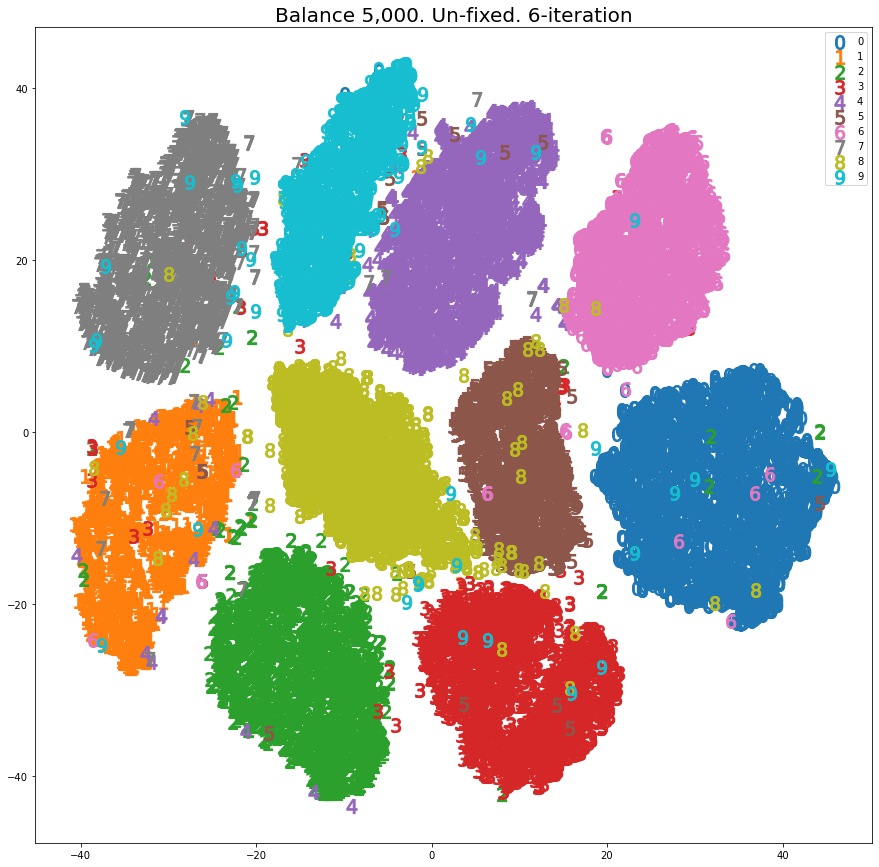

x_labeled.shape
 (23000, 28, 28)
y_labeled.shape
 (23000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.9211
predictions.shape
 (12000, 10)
len(prob_row_pair)
 12000
len(prob_row_pair_sorted)
 12000
len(expected_reference_rows)
 12000
sorted_predictions.shape
 (12000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([7 6 2 3 3], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


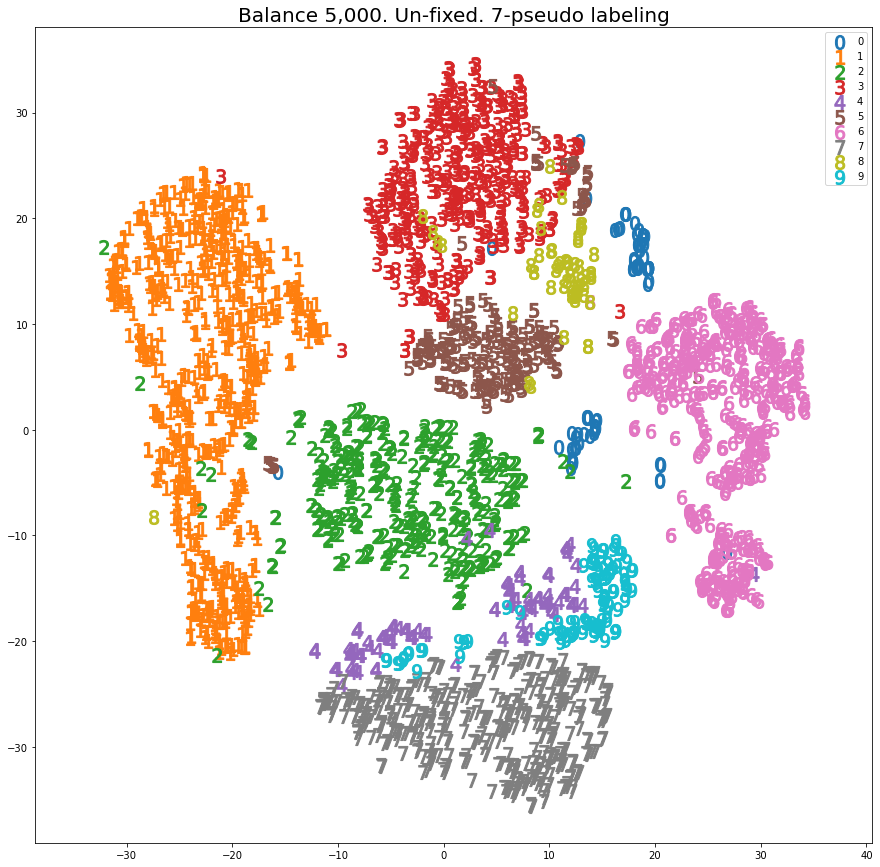

x_unlabeled.shape
 (9000, 28, 28)
len(x_unlabeled) : 9000
---------------------------------------------------------
ITERATION : 7
Epoch 1/200
650/650 [==============================] - 2s 3ms/step - loss: 0.1182 - accuracy: 0.9852 - val_loss: 0.1251 - val_accuracy: 0.9885
Epoch 2/200
650/650 [==============================] - 1s 2ms/step - loss: 0.1174 - accuracy: 0.9856 - val_loss: 0.1364 - val_accuracy: 0.9835
Epoch 3/200
650/650 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.9867 - val_loss: 0.1227 - val_accuracy: 0.9867
Epoch 4/200
650/650 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9856 - val_loss: 0.1268 - val_accuracy: 0.9844
Epoch 5/200
650/650 [==============================] - 1s 2ms/step - loss: 0.1202 - accuracy: 0.9846 - val_loss: 0.1574 - val_accuracy: 0.9752
Epoch 6/200
650/650 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.9865 - val_loss: 0.1816 - val_accuracy: 0.9602
Epoch 7/200


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


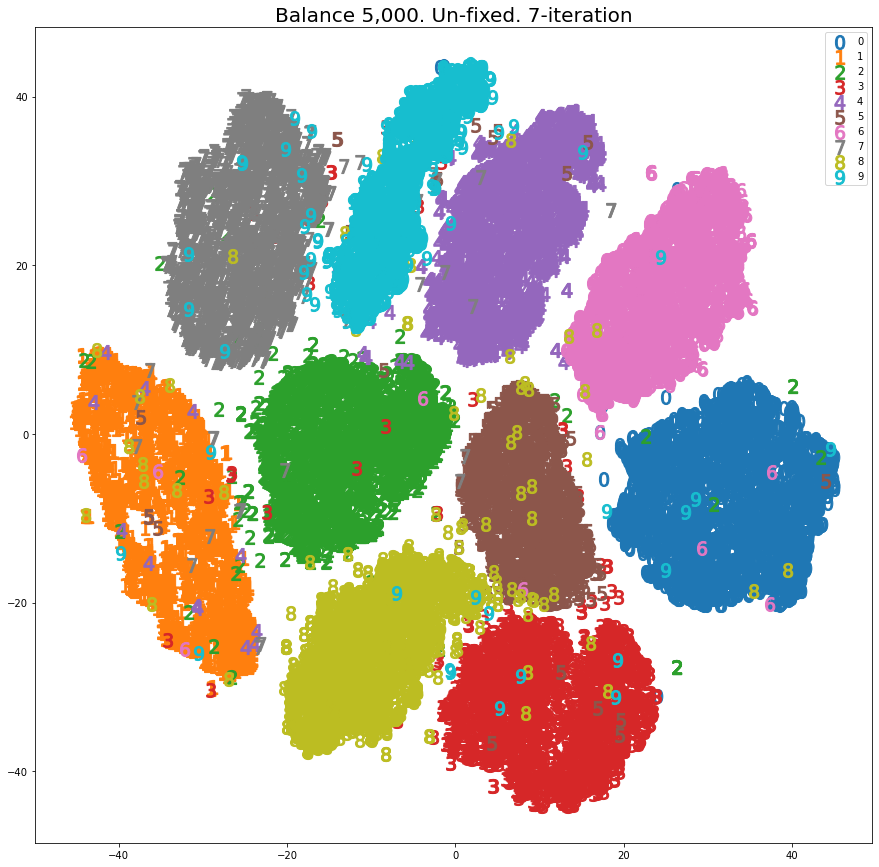

x_labeled.shape
 (26000, 28, 28)
y_labeled.shape
 (26000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.9218
predictions.shape
 (9000, 10)
len(prob_row_pair)
 9000
len(prob_row_pair_sorted)
 9000
len(expected_reference_rows)
 9000
sorted_predictions.shape
 (9000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([2 5 2 9 5], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


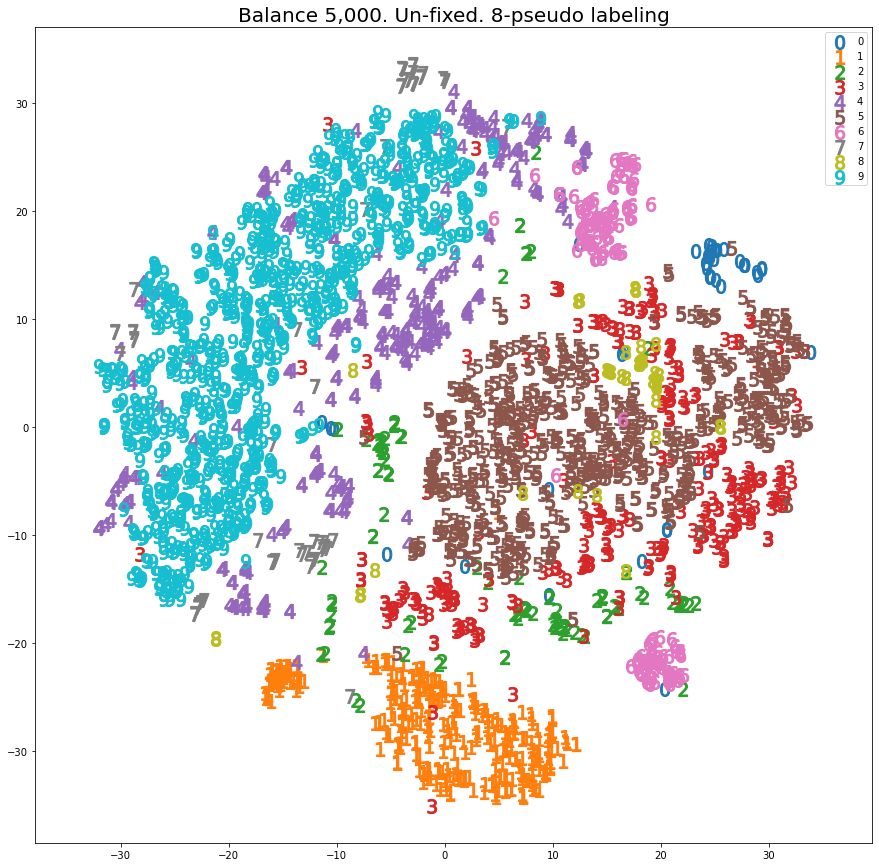

x_unlabeled.shape
 (6000, 28, 28)
len(x_unlabeled) : 6000
---------------------------------------------------------
ITERATION : 8
Epoch 1/200
725/725 [==============================] - 2s 3ms/step - loss: 0.1172 - accuracy: 0.9859 - val_loss: 0.1943 - val_accuracy: 0.9641
Epoch 2/200
725/725 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9875 - val_loss: 0.1963 - val_accuracy: 0.9636
Epoch 3/200
725/725 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9863 - val_loss: 0.2617 - val_accuracy: 0.9393
Epoch 4/200
725/725 [==============================] - 1s 2ms/step - loss: 0.1105 - accuracy: 0.9862 - val_loss: 0.2137 - val_accuracy: 0.9548
Epoch 5/200
725/725 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9873 - val_loss: 0.4344 - val_accuracy: 0.8838
Epoch 6/200
725/725 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9862 - val_loss: 0.2367 - val_accuracy: 0.9447
Epoch 6: ear

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


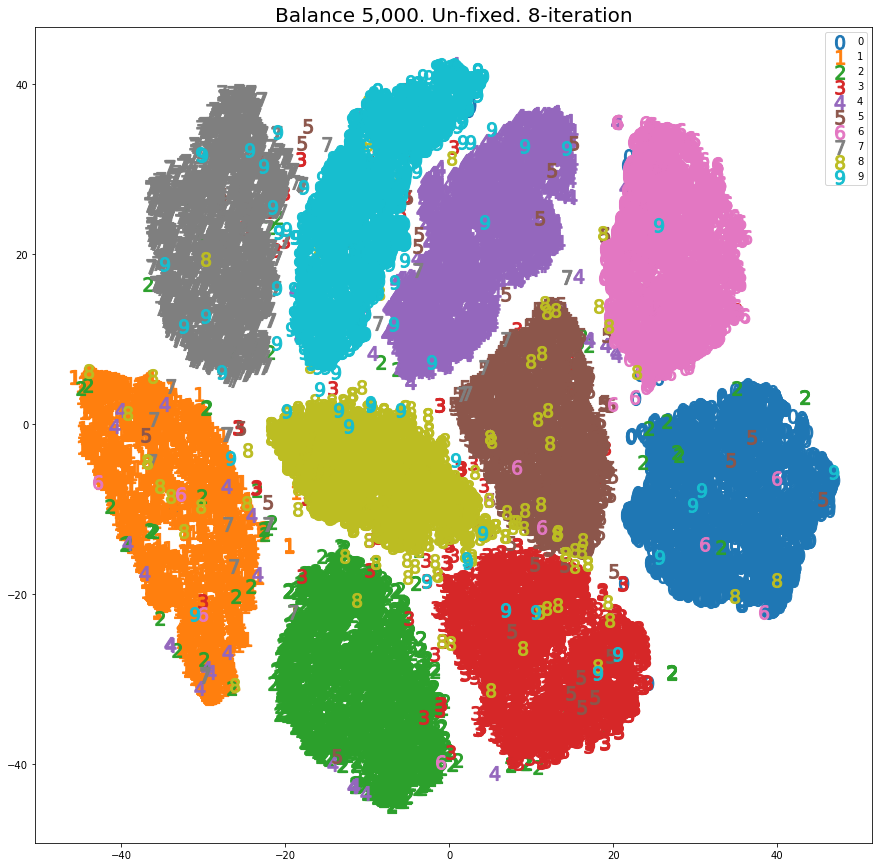

x_labeled.shape
 (29000, 28, 28)
y_labeled.shape
 (29000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.9266
predictions.shape
 (6000, 10)
len(prob_row_pair)
 6000
len(prob_row_pair_sorted)
 6000
len(expected_reference_rows)
 6000
sorted_predictions.shape
 (6000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([6 5 6 6 6], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


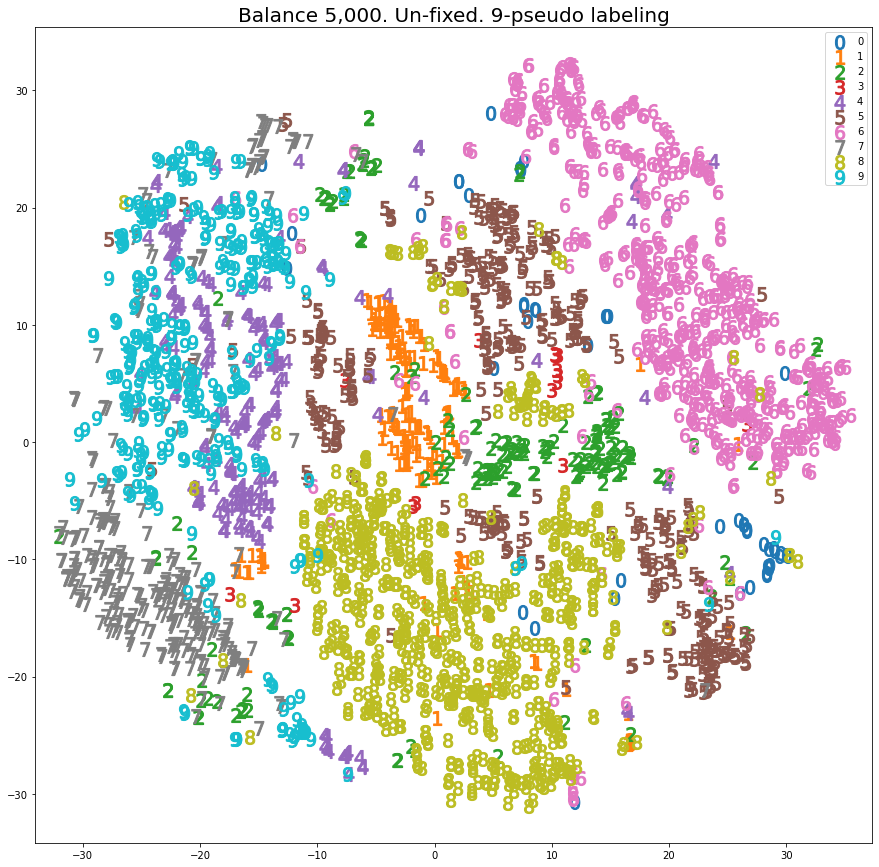

x_unlabeled.shape
 (3000, 28, 28)
len(x_unlabeled) : 3000
---------------------------------------------------------
ITERATION : 9
Epoch 1/200
800/800 [==============================] - 2s 3ms/step - loss: 0.1136 - accuracy: 0.9870 - val_loss: 0.2883 - val_accuracy: 0.9314
Epoch 2/200
800/800 [==============================] - 2s 2ms/step - loss: 0.1122 - accuracy: 0.9870 - val_loss: 0.3042 - val_accuracy: 0.9228
Epoch 3/200
800/800 [==============================] - 2s 2ms/step - loss: 0.1080 - accuracy: 0.9878 - val_loss: 0.3633 - val_accuracy: 0.9033
Epoch 4/200
800/800 [==============================] - 2s 2ms/step - loss: 0.1174 - accuracy: 0.9852 - val_loss: 0.2815 - val_accuracy: 0.9317
Epoch 5/200
800/800 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9875 - val_loss: 0.5171 - val_accuracy: 0.8370
Epoch 6/200
800/800 [==============================] - 2s 2ms/step - loss: 0.1095 - accuracy: 0.9883 - val_loss: 0.4549 - val_accuracy: 0.8723
Epoch 7/200


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


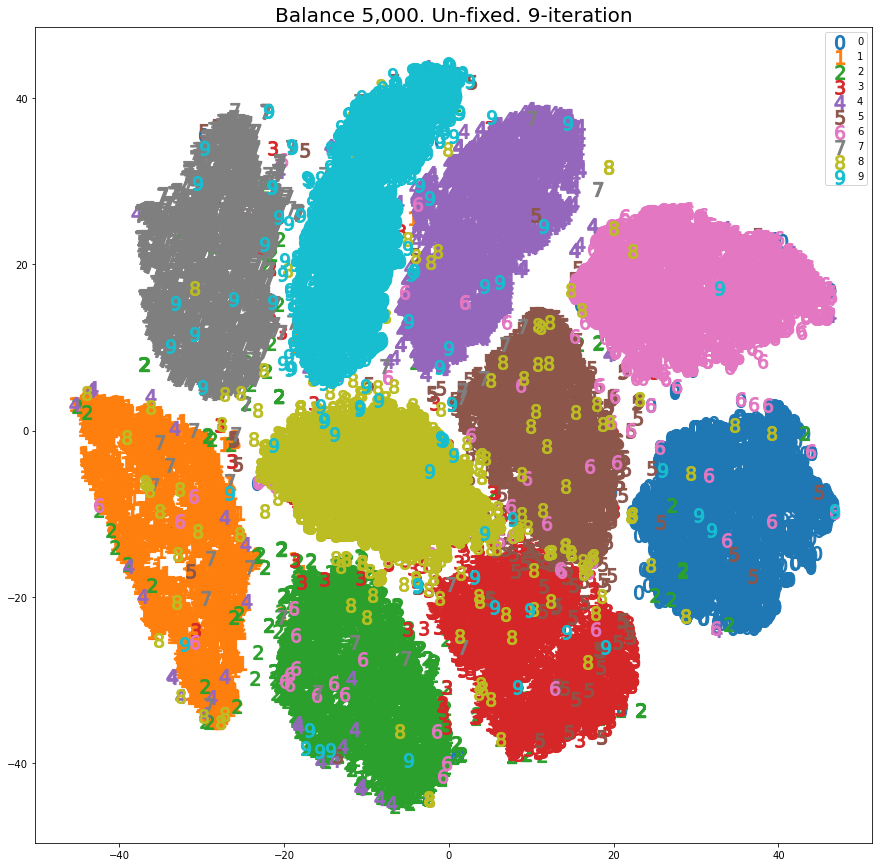

x_labeled.shape
 (32000, 28, 28)
y_labeled.shape
 (32000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.9198
predictions.shape
 (3000, 10)
len(prob_row_pair)
 3000
len(prob_row_pair_sorted)
 3000
len(expected_reference_rows)
 3000
sorted_predictions.shape
 (3000, 10)
sorted_y_pseudo_one_hot
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
x_sub.shape
 (3000, 28, 28)
y_sub.shape
 (3000, 10)
tf.Tensor([2 2 2 2 2], shape=(5,), dtype=int64)


C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


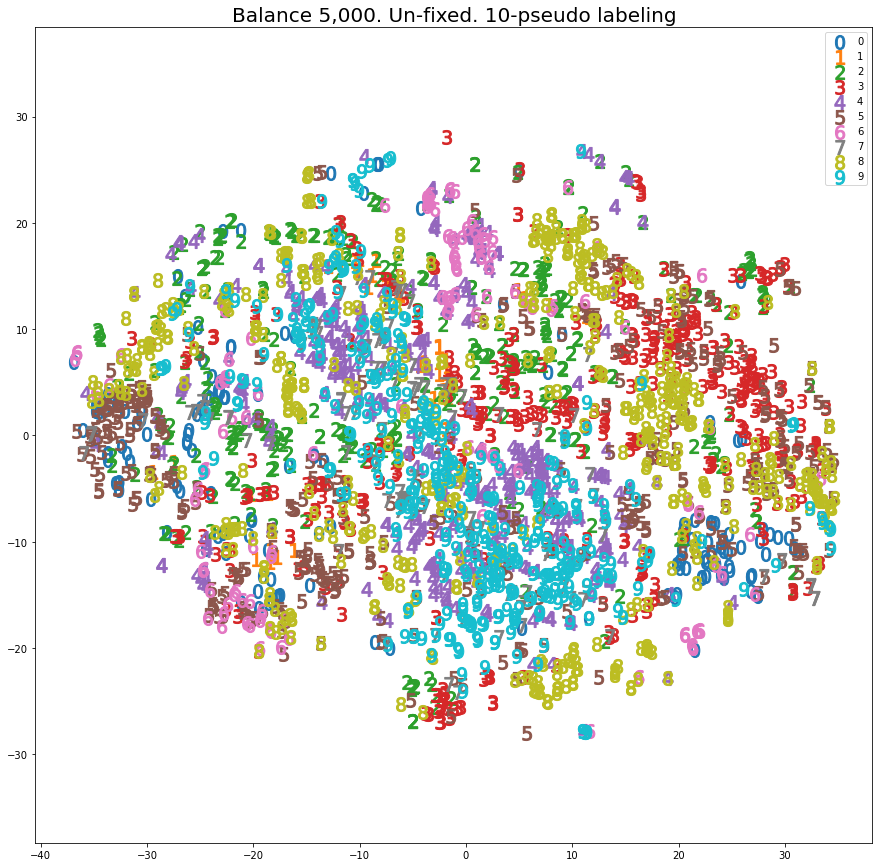

x_unlabeled.shape
 (0, 28, 28)
len(x_unlabeled) : 0
---------------------------------------------------------
ITERATION : 10
Epoch 1/200
875/875 [==============================] - 2s 2ms/step - loss: 0.1171 - accuracy: 0.9862 - val_loss: 0.6126 - val_accuracy: 0.7987
Epoch 2/200
875/875 [==============================] - 2s 2ms/step - loss: 0.1168 - accuracy: 0.9857 - val_loss: 1.0233 - val_accuracy: 0.6830
Epoch 3/200
875/875 [==============================] - 2s 2ms/step - loss: 0.1201 - accuracy: 0.9849 - val_loss: 0.7098 - val_accuracy: 0.7740
Epoch 4/200
875/875 [==============================] - 2s 2ms/step - loss: 0.1118 - accuracy: 0.9863 - val_loss: 0.8220 - val_accuracy: 0.7281
Epoch 5/200
875/875 [==============================] - 2s 2ms/step - loss: 0.1168 - accuracy: 0.9854 - val_loss: 0.6425 - val_accuracy: 0.7851
Epoch 6/200
875/875 [==============================] - 2s 2ms/step - loss: 0.1147 - accuracy: 0.9861 - val_loss: 0.6882 - val_accuracy: 0.7683
Epoch 6: early st

C:\Users\PARK\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


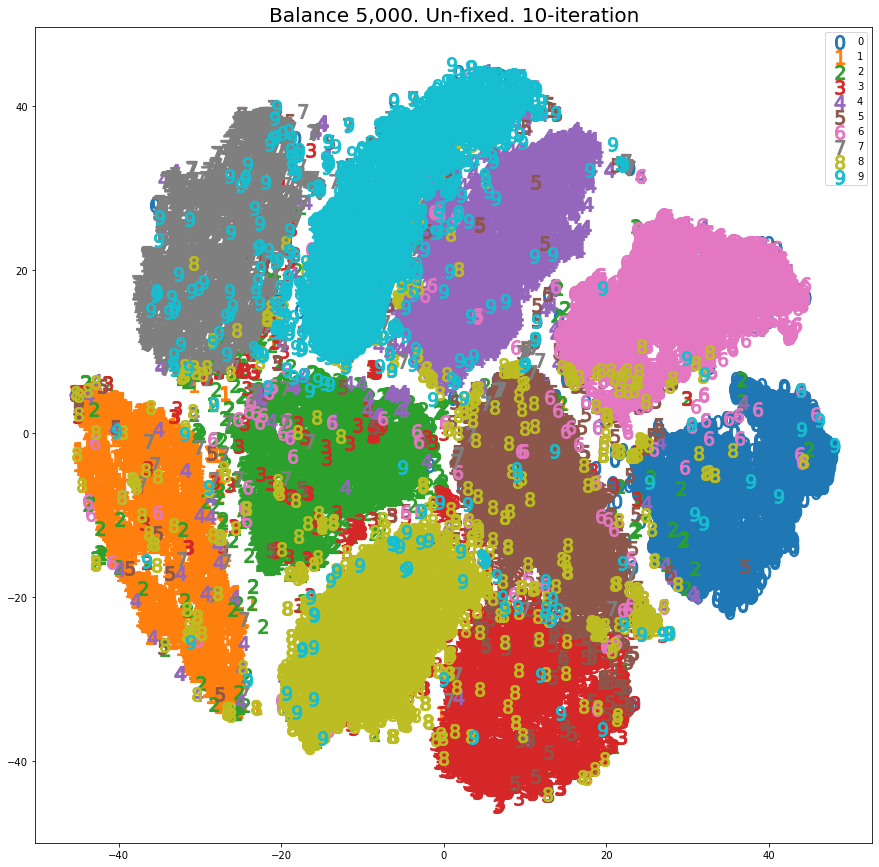

x_labeled.shape
 (35000, 28, 28)
y_labeled.shape
 (35000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.9206


In [14]:
# index of while-loop
iteration = 0

# train_score
train_loss = []
val_loss = []

# test_score
test_score_loss = []
test_score_acc = []

# hyper-parameter
learning_rate=1e-3
print("learning_rate\n", learning_rate)

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        verbose=1,
    )

initial_test = True

# self-train
while iteration < 11:
    print("ITERATION :", iteration)
    
    # train model
    history = model.fit(x_labeled, y_labeled, callbacks=[es], shuffle=True, validation_split=0.20, 
                        verbose=1, epochs=200)
    
    x_labeled_copy = x_labeled.reshape(-1, 784)
    y_labeled_copy = tf.argmax(y_labeled, axis=1)
    
    tsne_initial = TSNE(
            n_components=2,
            init="pca",
            learning_rate="auto",
            n_iter=500,
            n_iter_without_progress=150,
            n_jobs=2,
            random_state=0).fit_transform(x_labeled_copy)

    
    plt.figure(figsize=(15,15))
    
    for i in range(10):
        plt.title(f"Balance 5,000. Un-fixed. {iteration}-iteration", size=20)
        plt.scatter(tsne_initial[y_labeled_copy==i, 0], tsne_initial[y_labeled_copy==i, 1], 
                label=i, marker=f"${i}$", s=200)
        
    plt.legend()
    plt.show()

    
    print("x_labeled.shape\n", x_labeled.shape)
    print("y_labeled.shape\n", y_labeled.shape)
    
    
    loss, acc = model.evaluate(x_test, y_test)
    test_score_loss.append(loss)
    test_score_acc.append(acc)
    
    
    train_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    
    
    iteration +=1
    
    
    if len(x_unlabeled) != 0:
        
        # prediction
        predictions = model.predict(x_unlabeled, verbose=0)
        #print("predictions\n", predictions[0:5])
        print("predictions.shape\n", predictions.shape)


        y_pseudo = np.argmax(predictions, axis=1)
        #print("y_pseudo\n",y_pseudo[0:5])


        y_pseudo_one_hot = np.eye(10)[y_pseudo]
        #print("y_pseudo_one_hot\n", y_pseudo_one_hot[0:5])


        high_prob = np.max(predictions, axis=1)
        #print("high_prob\n",high_prob[0:5])

        
        prob_row_pair = {}
        for idx in range(len(high_prob)):
            prob_row_pair[idx] = high_prob[idx]
            
        #print("prob_row_pair\n", list(prob_row_pair.items())[0:5])
        print("len(prob_row_pair)\n", len(list(prob_row_pair)))

        
        prob_row_pair_sorted = sorted(prob_row_pair.items(), key=operator.itemgetter(1), reverse=True)
        #print("prob_row_pair_sorted\n", prob_row_pair_sorted[0:5])
        print("len(prob_row_pair_sorted)\n", len(prob_row_pair_sorted))

        # modifying
        expected_reference_rows = list(dict(prob_row_pair_sorted).keys())
        #print("expected_reference_rows\n", expected_reference_rows[0:5])
        print("len(expected_reference_rows)\n", len(expected_reference_rows))


        sorted_predictions = predictions[expected_reference_rows, :]
        #print("sorted_predictions\n", sorted_predictions[0:5])
        print("sorted_predictions.shape\n", sorted_predictions.shape)


        sorted_y_pseudo = y_pseudo[expected_reference_rows]
        #print("sorted_y_pseudo\n", sorted_y_pseudo[0:5])
        

        sorted_y_pseudo_one_hot = np.eye(10)[sorted_y_pseudo]
        print("sorted_y_pseudo_one_hot\n", sorted_y_pseudo_one_hot[0:5])


        # top N will be selected
        x_sub = x_unlabeled[expected_reference_rows[:3000], :, :]
        y_sub = y_pseudo_one_hot[expected_reference_rows[:3000]]
        print("x_sub.shape\n", x_sub.shape)
        print("y_sub.shape\n", y_sub.shape)
        
        
        x_sub_copy = x_sub.reshape(-1, 784)
        y_sub_copy = tf.argmax(y_sub, axis=1)
        
                
        print(y_sub_copy[0:5])
        
        tsne = TSNE(
                            n_components=2,
                            init="pca",
                            learning_rate="auto",
                            n_iter=500,
                            n_iter_without_progress=150,
                            n_jobs=2,
                            random_state=0).fit_transform(x_sub_copy)

        
        
        plt.figure(figsize=(15,15))
        
        try:
            plt.scatter(tsne[y_sub_copy==0, 0], tsne[y_sub_copy==0, 1], label="0", marker="$0$", s=200)
        except:
            continue
            
        try :
            plt.scatter(tsne[y_sub_copy==1, 0], tsne[y_sub_copy==1, 1], label="1", marker="$1$", s=200)
        except:
            continue
            
        try:
            plt.scatter(tsne[y_sub_copy==2, 0], tsne[y_sub_copy==2, 1], label="2", marker="$2$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==3, 0], tsne[y_sub_copy==3, 1], label="3", marker="$3$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==4, 0], tsne[y_sub_copy==4, 1], label="4", marker="$4$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==5, 0], tsne[y_sub_copy==5, 1], label="5", marker="$5$", s=200)
        except:
            continue
       
        try:
            plt.scatter(tsne[y_sub_copy==6, 0], tsne[y_sub_copy==6, 1], label="6", marker="$6$", s=200)
        except:
            continue
            
        try:
            plt.scatter(tsne[y_sub_copy==7, 0], tsne[y_sub_copy==7, 1], label="7", marker="$7$", s=200)
        except:
            continue
            
        try:
            plt.scatter(tsne[y_sub_copy==8, 0], tsne[y_sub_copy==8, 1], label="8", marker="$8$", s=200)
        except:
            continue
        
        try:
            plt.scatter(tsne[y_sub_copy==9, 0], tsne[y_sub_copy==9, 1], label="9", marker="$9$", s=200)
        except:
            continue
            
        plt.title(f"Balance 5,000. Un-fixed. {iteration}-pseudo labeling", size=20)
        plt.gca().set_aspect('equal', 'datalim')
        plt.legend()
        #plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
        plt.show()

        x_unlabeled = np.delete(x_unlabeled, expected_reference_rows[:3000], axis=0)
        print("x_unlabeled.shape\n" , x_unlabeled.shape)
        print("len(x_unlabeled) :", len(x_unlabeled))


        x_labeled = np.concatenate([x_labeled, x_sub], axis=0)
        y_labeled = np.concatenate([y_labeled, y_sub], axis=0)


        print("---------------------------------------------------------")
        


In [15]:
for i in range(len(train_loss)):
    print(train_loss[i])
    print()

[2.6209988594055176, 0.7632733583450317, 0.5812903046607971, 0.5238549709320068, 0.49224424362182617, 0.48326677083969116, 0.4563513398170471, 0.4573276937007904, 0.4515105187892914, 0.4348982274532318, 0.4178858697414398, 0.41042834520339966, 0.4104897677898407, 0.3930537700653076, 0.39483436942100525, 0.4078162908554077, 0.38599544763565063, 0.37409913539886475, 0.36343228816986084]

[0.3493155241012573, 0.34074583649635315, 0.34084492921829224, 0.3224307596683502, 0.3233415186405182, 0.32217302918434143, 0.31894609332084656, 0.3048403263092041, 0.3069363534450531, 0.2989632189273834, 0.28748825192451477, 0.2834416627883911, 0.30320990085601807, 0.29036015272140503, 0.28362375497817993, 0.28653180599212646, 0.2781623303890228, 0.27907317876815796, 0.27439916133880615, 0.2741600275039673, 0.25532495975494385, 0.25039955973625183, 0.2443261742591858, 0.2552986443042755, 0.25072360038757324, 0.2422635704278946, 0.24768422544002533]

[0.20589318871498108, 0.21625368297100067, 0.218098998

In [16]:
for i in range(len(val_loss)):
    print(val_loss[i])
    print()

[1.0255433320999146, 0.6701767444610596, 0.6065124273300171, 0.5763050317764282, 0.564454197883606, 0.5405798554420471, 0.49506014585494995, 0.5386639833450317, 0.5332931876182556, 0.49590253829956055, 0.5271618366241455, 0.4718390703201294, 0.4633975028991699, 0.46102720499038696, 0.48034757375717163, 0.48672863841056824, 0.4773251414299011, 0.47829538583755493, 0.49433380365371704]

[0.17843185365200043, 0.1822807937860489, 0.1847222000360489, 0.1747075319290161, 0.1706039309501648, 0.16750851273536682, 0.16999296844005585, 0.16803142428398132, 0.1653069704771042, 0.1666780412197113, 0.1538751870393753, 0.15813998878002167, 0.17196805775165558, 0.1630103886127472, 0.15356004238128662, 0.15628217160701752, 0.15976668894290924, 0.1584482640028, 0.14958876371383667, 0.15381449460983276, 0.14456798136234283, 0.13494519889354706, 0.1454828977584839, 0.14929775893688202, 0.14135296642780304, 0.14950844645500183, 0.13991117477416992]

[0.12616018950939178, 0.1376257985830307, 0.140128284692

# Train/Val Loss

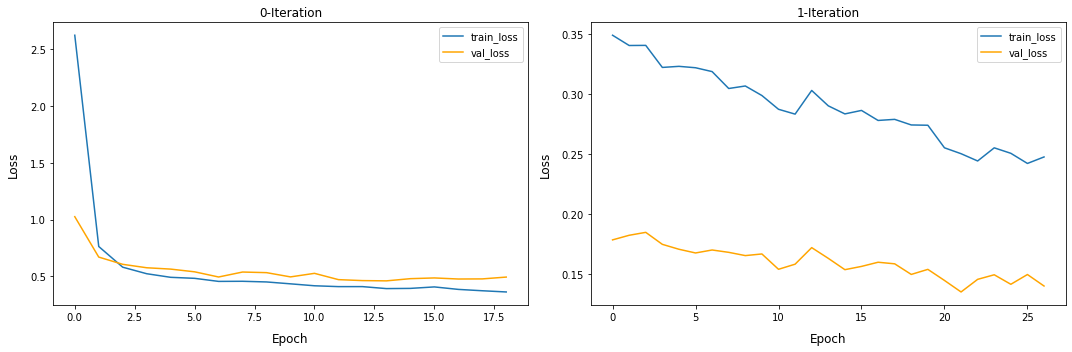

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(0))
plt.plot(train_loss[0], label='train_loss')
plt.plot(val_loss[0], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()


plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(1))
plt.plot(train_loss[1], label='train_loss')
plt.plot(val_loss[1], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

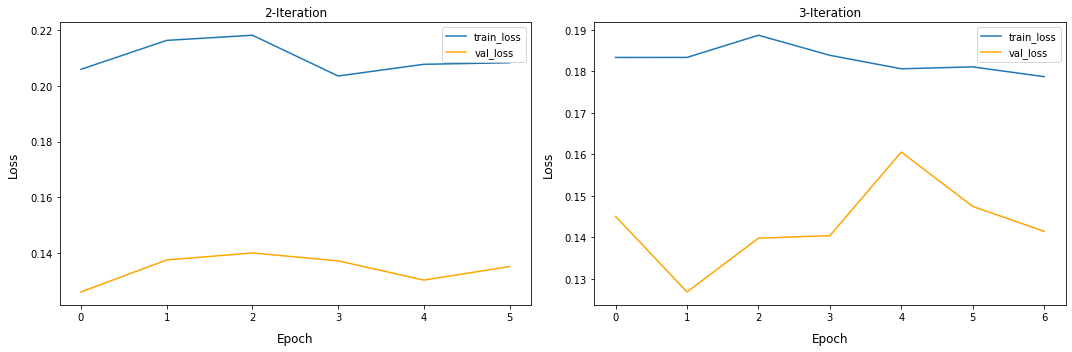

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(2))
plt.plot(train_loss[2], label='train_loss')
plt.plot(val_loss[2], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(3))
plt.plot(train_loss[3], label='train_loss')
plt.plot(val_loss[3], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

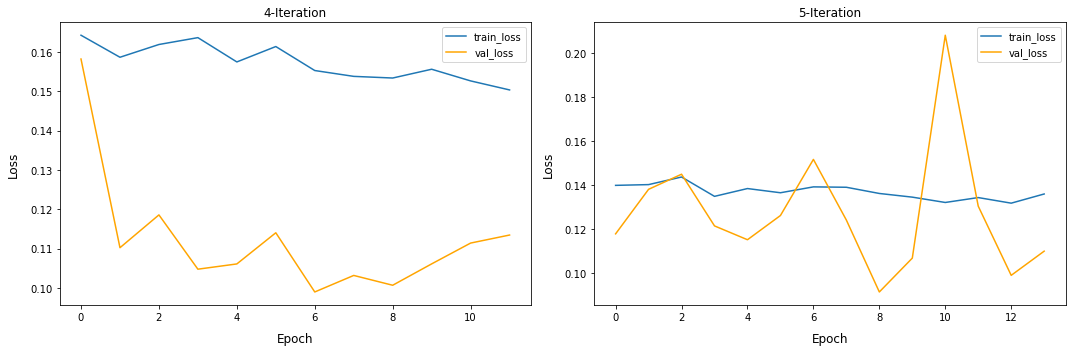

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(4))
plt.plot(train_loss[4], label='train_loss')
plt.plot(val_loss[4], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(5))
plt.plot(train_loss[5], label='train_loss')
plt.plot(val_loss[5], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

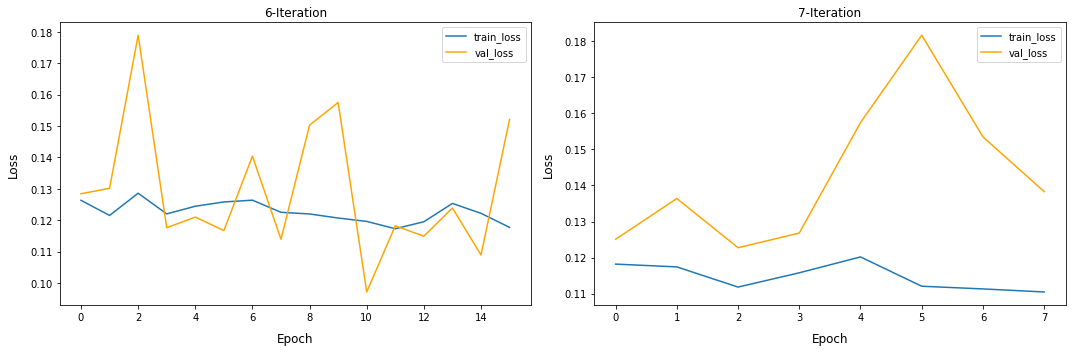

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(6))
plt.plot(train_loss[6], label='train_loss')
plt.plot(val_loss[6], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(7))
plt.plot(train_loss[7], label='train_loss')
plt.plot(val_loss[7], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

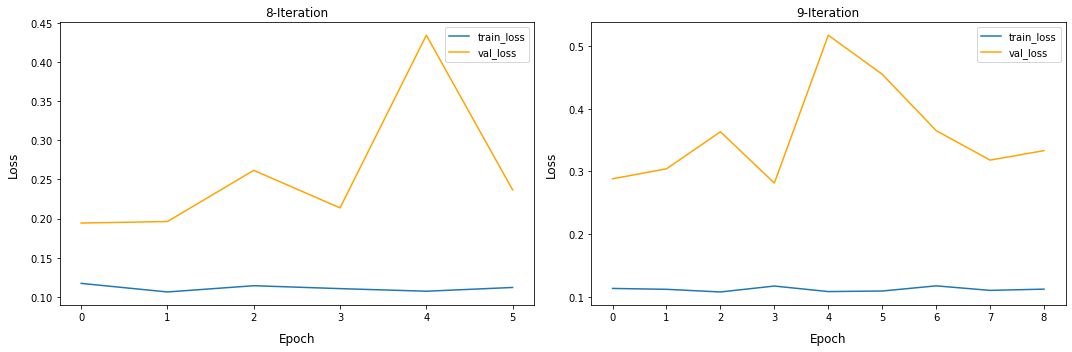

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('{}-Iteration'.format(8))
plt.plot(train_loss[8], label='train_loss')
plt.plot(val_loss[8], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.subplot(1,2,2)
plt.title('{}-Iteration'.format(9))
plt.plot(train_loss[9], label='train_loss')
plt.plot(val_loss[9], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

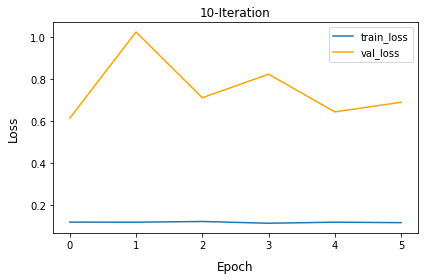

In [22]:
plt.title('{}-Iteration'.format(10))
plt.plot(train_loss[10], label='train_loss')
plt.plot(val_loss[10], color='orange', label='val_loss')
plt.xlabel('Epoch', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Loss', labelpad=10, fontdict={'size' : 12})
plt.legend()

plt.tight_layout()

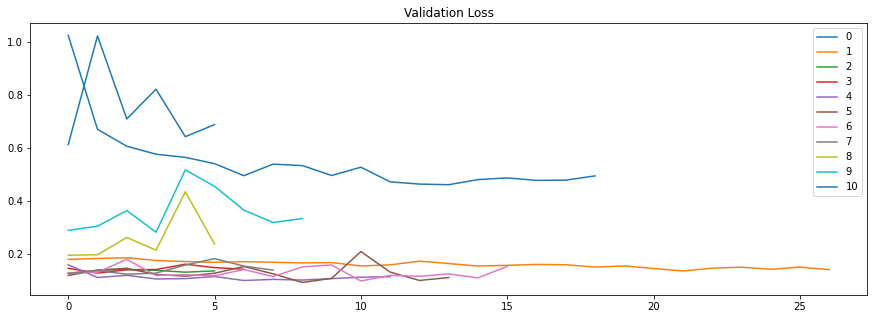

In [23]:
plt.figure(figsize=(15,5))
plt.title('Validation Loss')
plt.plot(val_loss[0], label='0')
plt.plot(val_loss[1], label='1')
plt.plot(val_loss[2], label='2')
plt.plot(val_loss[3], label='3')
plt.plot(val_loss[4], label='4')
plt.plot(val_loss[5], label='5')
plt.plot(val_loss[6], label='6')
plt.plot(val_loss[7], label='7')
plt.plot(val_loss[8], label='8')
plt.plot(val_loss[9], label='9')
plt.plot(val_loss[10], label='10')
plt.legend()

# TEST SCORE

In [24]:
print('test_score_loss\n',test_score_loss)
print('test_score_acc\n',test_score_acc)

test_score_loss
 [0.5070132613182068, 0.34303438663482666, 0.38765257596969604, 0.36861109733581543, 0.3143722116947174, 0.35278502106666565, 0.3420521318912506, 0.31568989157676697, 0.3144693374633789, 0.33366134762763977, 0.340617299079895]
test_score_acc
 [0.8960000276565552, 0.9366000294685364, 0.9172999858856201, 0.9143000245094299, 0.9261999726295471, 0.9143000245094299, 0.9211000204086304, 0.9218000173568726, 0.9265999794006348, 0.9197999835014343, 0.9205999970436096]


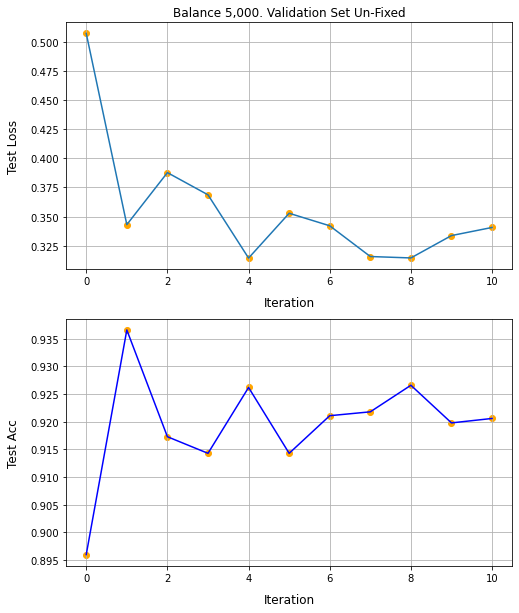

In [25]:
plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.title("Balance 5,000. Validation Set Un-Fixed")
plt.scatter(range(11), test_score_loss, color='orange')
plt.plot(test_score_loss)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Test Loss', labelpad=10, fontdict={'size' : 12})
plt.grid(True)

plt.subplot(2,1,2)
plt.scatter(range(11), test_score_acc, color='orange')
plt.plot(test_score_acc, color='blue')
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 12})
plt.ylabel('Test Acc', labelpad=10, fontdict={'size' : 12})
plt.grid(True)